In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

In [2]:
def db_connection(user, password, host, port,db):
    engine= psycopg2.connect(
         user= user,
         password= password,
         host= host,
         port=port,
         database= db
    )
    return engine

In [3]:
db_engine= db_connection(user='postgres', password='postgres', host='localhost', port=5432 ,db='retail_raw')

In [4]:
def execute_query(query):
    df = pd.read_sql(query, db_engine, index_col='Id')
    return df


In [5]:
sql = '''
    SELECT * 
    FROM raw_data
    '''
raw_data= execute_query(sql).copy()
raw_data.head(5)

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_10564\3753571756.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_engine, index_col='Id')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
raw_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
raw_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Starting Data Cleaning

### Check for the data dublicates

In [8]:
df= raw_data[raw_data[['Description']].isna()]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df= raw_data[raw_data[['CustomerID']].isna()]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### When Descruption is null, the CustomerID is too null, so I decied to drop nulls 

In [11]:
df = raw_data[~raw_data['Description'].isna()]
df.shape

(540455, 8)

### Explore the nulls in Customer id to make descision about it

In [12]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

### As it's mentioned, when customer id is null the whole colunmns too is null,
### so i will drop the nulls in customerid where all columns is null too.

In [13]:
#condition= raw_data['CustomerID'].isna() and raw_data['InvoiceDate'].isna() and raw_data['Description'].isna() and raw_data['Quantity'].isna()"
customerNa= df[df['CustomerID'].isna()]
customerNa.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

### There is no relation between when customer is null and any other column, so we can drop the nulls now

In [14]:
df= df[~df['CustomerID'].isna()]
df.shape

(406829, 8)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df[df.duplicated()].count()
df.shape

(406829, 8)

In [18]:
df= df.drop_duplicates()

In [19]:
df[df.duplicated()].count()
df.shape

(401604, 8)

In [20]:
df.shape

(401604, 8)

### Handling the outliers in Quantity Col

In [21]:
max_val=df['Quantity'].max()
max_val

80995

In [22]:
min_val= df['Quantity'].min()
min_val

-80995

### No quantity in negative, so i will convert all negative values

In [23]:
df.loc[df['Quantity'] <0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom


In [24]:
df.loc[df['Quantity'] < 0, 'Quantity'] = df.loc[df['Quantity'] < 0, 'Quantity'] * -1
df.shape

(401604, 8)

In [25]:
min_val=df['Quantity'].min()
min_val

1

In [26]:
first_quartile =df['Quantity'].quantile(0.25)
first_quartile

2.0

In [27]:
third_quartile =df['Quantity'].quantile(0.75)
third_quartile

12.0

In [28]:
IQR= third_quartile - first_quartile
IQR

10.0

In [29]:
df['Quantity'].value_counts()

1      73433
12     60345
2      58751
6      37948
4      32547
       ...  
164        1
588        1
188        1
147        1
157        1
Name: Quantity, Length: 310, dtype: int64

In [30]:
# max = IQR*10+Q3 threshold here is 10
max_outlier= IQR*10+third_quartile
max_outlier

112.0

In [31]:
df.loc[df['Quantity'] >max_outlier].count()

InvoiceNo      4657
StockCode      4657
Description    4657
Quantity       4657
InvoiceDate    4657
UnitPrice      4657
CustomerID     4657
Country        4657
dtype: int64

In [32]:
df.loc[df['Quantity'] >max_outlier] = max_outlier

In [33]:
df.loc[df['Quantity'] <max_outlier]['Quantity'].max()

110

<Axes: >

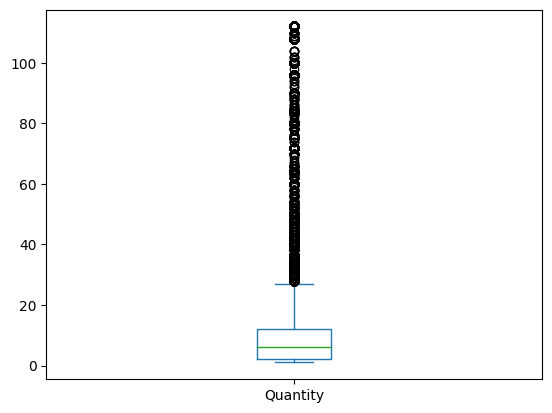

In [34]:
df['Quantity'].plot(kind='box')

### Check Outliers in price

In [35]:
df.shape

(401604, 8)

In [36]:
df['UnitPrice'].value_counts()

1.25      45660
1.65      36758
2.95      26789
0.85      26015
0.42      21310
          ...  
190.80        1
26.05         1
36.50         1
45.60         1
224.69        1
Name: UnitPrice, Length: 587, dtype: int64

In [37]:
df.loc[df['UnitPrice'] > 190].count()

InvoiceNo      166
StockCode      166
Description    166
Quantity       166
InvoiceDate    166
UnitPrice      166
CustomerID     166
Country        166
dtype: int64

In [38]:
price_max_val= df['UnitPrice'].max()
price_max_val

38970.0

In [39]:
price_min_val= df['UnitPrice'].min()
price_min_val

0.0

In [40]:
Q1= df['UnitPrice'].quantile(0.25)
Q3= df['UnitPrice'].quantile(0.75)
IQR= Q3-Q1
print("Q1:",Q1)
print("Q2:",Q3)
print("IQR:",IQR)
max_outlier= IQR*1.5+Q3
print("max outlier value", max_outlier)

Q1: 1.25
Q2: 3.75
IQR: 2.5
max outlier value 7.5


<Axes: >

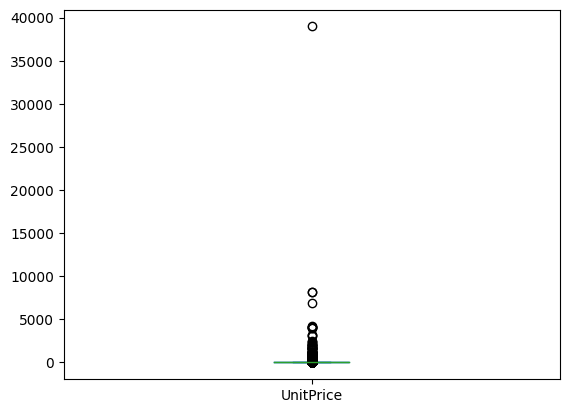

In [41]:
df['UnitPrice'].plot(kind='box')

In [42]:
df.loc[df['UnitPrice'] >750].count()

InvoiceNo      56
StockCode      56
Description    56
Quantity       56
InvoiceDate    56
UnitPrice      56
CustomerID     56
Country        56
dtype: int64

In [43]:
df.loc[df['UnitPrice'] >750]= 750

<Axes: >

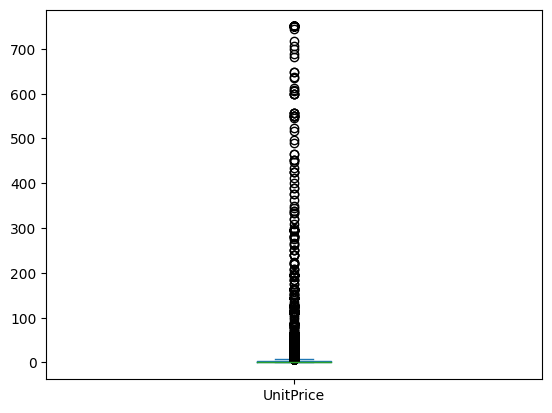

In [44]:
df['UnitPrice'].plot(kind='box')

### Now Data Cleaned, not have Duplicates or Outliers. and ready to be staged in the Database

In [45]:
df.shape

(401604, 8)

In [46]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [47]:
df['CustomerID']= df['CustomerID'].astype(int)
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [48]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

In [49]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [50]:
def db_connection(user, password, host, port,db):
    engine= create_engine(
         f'postgresql://{user}:{password}@{host}:{port}/{db}'
    )
    engine.connect()
    return engine

In [51]:
engine= db_connection(user='postgres', password='postgres', host='localhost', port=5432 ,db='bronze')

In [52]:
df.shape

(401604, 8)

In [53]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

In [54]:
df.head(n=0).to_sql(name='retail_cleaned', con=engine, if_exists='replace', index=True, index_label='Id')

0

In [55]:
df.shape

(401604, 8)

In [56]:
df.to_sql(name='retail_cleaned', con=engine, if_exists='append', index=True, index_label='Id')

604